# Low-Rank Adaptation of Stable Diffusion (LoRA)
Low-Rank Adaptation of Large Language Models (LoRA) is a training method that accelerates the training of large models while consuming less memory. It adds pairs of rank-decomposition weight matrices (called update matrices) to existing weights, and only trains those newly added weights. This has a couple of advantages:



1. Previous pretrained weights are kept frozen so the model is not as prone to catastrophic forgetting.
2. Rank-decomposition matrices have significantly fewer parameters than the original model, which means that trained LoRA weights are easily portable.
LoRA matrices are generally added to the attention layers of the original model.
3. Diffusers provides the load_attn_procs() method to load the LoRA weights into a model’s attention layers. You can control the extent to which the model is adapted toward new training images via a scale parameter.
4. The greater memory-efficiency allows you to run fine-tuning on consumer GPUs and readily accessible in Kaggle or Google Colab notebooks.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Why Stable Diffusion?

Finetuning a model like Stable Diffusion, which has billions of parameters, can be slow and difficult. With LoRA, it is much easier and faster to finetune a diffusion model. It can run on hardware with as little as 11GB of GPU RAM without resorting to tricks such as 8-bit optimizers.



*   Diffusion model is more efficent and easy train rather than GAN , DreamBooth and other text-to-img model.
*   LoRA Supports Diffusion model Fine tunining with great efficency



# Training Stable Diffusion using LoRA


**Installing dependencies**






```
# !git clone https://github.com/huggingface/diffusers
```

To get Pretrained Satble diffusion model V1-4 and a Text-to-image model



*   Installing dataset to load our train dataset.



In [ ]:
# !git clone https://github.com/huggingface/diffusers

!pip install accelerate
!pip install datasets
!pip install transformers
!pip install git+https://github.com/huggingface/diffusers

# Setting environment


**Travelling to diffusers directory to training Script**

In [ ]:
import os

os.getcwd()
os.chdir('diffusers/examples/')


In [ ]:
os.chdir('text_to_image')

**Displaying Content**

In [ ]:
ls

README.md              requirements.txt             train_text_to_image_lora.py
requirements_flax.txt  train_text_to_image_flax.py  train_text_to_image.py


Here, train_text_to_image_lora.py script where we going to test are own dataset using some modifications

**To Check GPU is getting used or not**

In [ ]:
!accelerate env

2023-05-31 09:42:09.852084: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

Copy-and-paste the text below in your GitHub issue

- `Accelerate` version: 0.19.0
- Platform: Linux-5.15.107+-x86_64-with-glibc2.31
- Python version: 3.10.11
- Numpy version: 1.22.4
- PyTorch version (GPU?): 2.0.1+cu118 (True)
- System RAM: 12.68 GB
- GPU type: Tesla T4
- `Accelerate` default config:
	Not found


# Input parameters and training script

**Steps**

1.   Change the path of dataset to your directory or leave it as default
2.   Changes can be done according to desire
3.   For now model is trained in 20 Epoch for each img of set of 50.
4.   To see dataset structure to train go to [DataSet](https://huggingface.co/docs/datasets/v2.4.0/en/image_load#imagefolder-with-metadata).
5.[Adaptation by Stable Difussion method](https://https://github.com/huggingface/diffusers/tree/main/examples/text_to_image)
6. All the dataset is present in my Google drive ['content/drive/MyDrive/LORA/interior_dataset'].









```
**
 --mixed_precision="fp16" train_text_to_image_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME --caption_column="text" \
  --resolution=512 --random_flip \
  --train_batch_size=1 \
  --num_train_epochs=100 --checkpointing_steps=5000 \
  --learning_rate=1e-04 --lr_scheduler="constant" --lr_warmup_steps=0 \

  --output_dir="sd-pokemon-model-lora" \
  --validation_prompt="cute dragon creature" **
```





*   --pretrained_model_name_or_path : Stable diffusion model (if V1-4 then 512 and if V2 the 768 resulation
*   --resolution : resolution of img
*  --max_train_steps: epoch you want [epoch = max_train/number of img]
* --checkpointing_step : at which steps yopu want to have checkpoints so you resume your work after that check piont for scalability
*  --mixed_precision : percision you want to open 32 if have powerful system if not then open in 16


**Here We have train for 20 Epoch which means 20 times for each Image.**

In [ ]:
! python  train_text_to_image_lora.py --mixed_precision='fp16' --pretrained_model_name_or_path='CompVis/stable-diffusion-v1-4'   --dataset_name='/content/interior_dataset'  --caption_column='text'  --resolution=512 --random_flip --train_batch_size=1  --max_train_steps=1000  --checkpointing_steps=100  --learning_rate=1e-04 --lr_scheduler="constant" --lr_warmup_steps=0   --seed=42 --output_dir="/content/output_LoRa" --validation_prompt="Zig Zag pattern Boho Kitchen Tiles"


**The stable Difussion model has been used.**

Tarined model will get save automatically to output Directory.

# Loading Our Trained model and testing. [For testing Install dependencies above and run from here


**Script to load out trained model using LoRA**



1.   Path to our model is giving to generate output
2.   Initialized our model using stable diffusion and processing to pipe



In [ ]:
#before

from diffusers import StableDiffusionPipeline
import torch


pipe2 = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

pipe2.to("cuda")


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.18.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "/content/drive/MyDrive/LORA/Trained_Lora/Trained_model_using_LoRA.bin"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.unet.load_attn_procs(model_path)
# pipe.to("cuda")


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.



1. Fucntion to generate output sets of 5.



In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


  Giving prompt to test out model with number of images = 5



In [ ]:


number_images = 1
prompt2 = ["A dog singing the song a candle in the wind"] * number_images
images2 = pipe2(prompt2, num_inference_steps=50, guidance_scale=8).images
grid2 = image_grid(images2, rows=1, cols=1)
# image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
#trained
number_images = 5
prompt1 = ["A Study Room in Black color theme with wooden furnitures."] * number_images
images1 = pipe(prompt1, num_inference_steps=30, guidance_scale=8.5).images
grid1 = image_grid(images1, rows=1, cols=5)
# image.show()

**Guidance Scale** : a parameter that controls how much the image generation process follows the text prompt.

More the guidance scale more  better.

# Output

**Here 5 images geenrated by our tarin model**

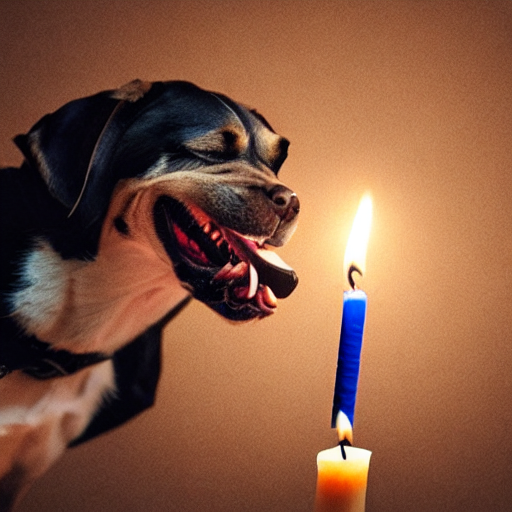

In [ ]:
grid2

In [ ]:
grid1

# Future Scope





   **Optimization is possible by affecting of paramaters explain below.**


*   Increasing number of Epoch to train and more precise image captioning.
*   Changing learn rate to 1e-05 to change learn rate.
*   By using most recent Stbale diffusion model for now i have use v1-4 .
*  Using LLM or Dreambooth to generate more Accurate results.




